# Biodiversity Project

## 1 Introduction:

The project was sourced from 'Code Academy' as a portfolio project. 

### 1.1 Screening

There is 423 National Parks in the US with 84 Million Acres of land in total, covering wast amounts of habitat. Changing climate, pollution and growing cities puts the species at risk. 

There is different levels for 'Conservation Status'. This project only looks at 5: 'Not At Risk', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'.

The problem of endangered species is real and has a vast social impact on how we live and interact with nature. 

The Data I have can play a role in solving that problem.


### 1.2 Goals

The goal of this project is to understand the biodiversity in the National Parks. Which species and what category groups are most in risk. To explore the characteristics about the species and their conservations status as well as their relationship between each other. Which species are most common and least common. Does it effect their conservation status? And many more.

### 1.3 Actions

The actions would be to educate and make aware people, of local biodiversity in National Parks of US. Help to protect those species and the natural habitats they are living in.

### 1.4 Data

The data is provided by 'Code Academy' via the National Park Service US Department of Interrior.

It comes as two CSV databases: "species_info.csv", "observations.csv"

Traditionally the project has to be 'problem-centric', but due to the nature of this project it can only be 'data-centric', as it is the data I am required to work with, and I am limited to it.

There are 1338 rows and 7 columns in the CSV file provided, and there is no indication on how the data was collected and when it was collected. 

The "species_info.csv" file has 4 columns and 5824 rows of data. The "observations.csv" file has 3 columns and 23296 rows of data.

#### 1.4.1 Contents
    
There is no content and column describtion, but the 'National Parks Services' was used to source the majority of the column describtions.

__category:__ Animal Category

__scientific_name:__ Binomial Name (Latin name)

__common_names:__ Adopted name for common use in the normal language

__conservation_status:__ Animal Conservation Status

__park_name:__ Name of the US National Park

__observations:__ Species Sightings

### 1.5 Analysis

####  1.5.1 Data Analysis

Explaratory Data Analysis would be used to investigate the data.

#### 1.5.2 Data Visualisation

For the data visualisations, I would be relying partialy at Matplotlib and Seaborn libraries.


### 1.6 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from collections import Counter
from scipy.stats import chi2_contingency

### 2 Loading the Data

In [3]:
species = pd.read_csv("species_info.csv")

print(species.info())

display(species)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [4]:
observations = pd.read_csv("observations.csv")

print(observations.info())

display(observations)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


## 3 Explarotary Data Analysis

Due to the project being 'data-centric', I will be approaching it with the EDA method. First, I would like to understand how much cleaning will be required.

'Dirty' data can have column names, which are unappropriate or even conceal empty spaces, which are not always aparent. That can solve problems while attempting to work with the data in the future. 

#### 3.1 Inspecting the dataframe for mistakes and missing data

In [5]:
print(species.columns)
print(observations.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


Columns are appropriately named and there are no empty spaces.

The easiest way to inspect the data frame is to go through each column induvidually. 

"Species" dataframe: 

In [6]:
# Column: Category

# Checking for null values, returns False

print(species.category.isnull().values.any())

print(species.category.unique())

# There are 7 animal categories in this column

False
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [7]:
# Column: Scientific Name

# Checking for null values, returns False

print(species.scientific_name.isnull().values.any())

# It is impossible to check every scientific name for spelling errors manually, but there are 5541 unique examples.
# We will need to assume that they are correct for now.

print(len(species.scientific_name.unique()))

False
5541


In [8]:
# Column: Common Name

# Checking for null values, returns False

print(species.common_names.isnull().values.any())

# It is impossible to check every common name for spelling errors manually, but there are 5504 unique examples.

print(len(species.common_names.unique()))

False
5504


In [9]:
# Column: Conservation Status

# There are null values present in the conservation status and will need to be examined further.

print(species.conservation_status.isnull().values.any())
print(species.conservation_status.unique())

# There are no spelling mistakes, and the only issue is a nan value as part of presumingly 5 conservation 
# statuses. I would therefore make an educated assumption, for the time being, that the nan value, is a
# species not currently in danger or of concern.

species.conservation_status = species.conservation_status.replace(np.nan, 'Of No Concern', regex=True)

# We have replaced all NaN values with "Of No Concern"

True
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


"Observations" dataframe:

The name of the column "scientific_name" is shared with the species dataframe. We therefore will run the same tests, and check if the columns are identical.

In [10]:
# Column: Scientific Name

# Checking for null values, returns False

print(observations.scientific_name.isnull().values.any())

# It is impossible to check every scientific name for spelling errors manually, but there are 5541 unique examples.

print(len(observations.scientific_name.unique()))

# Check if the columns are identical

print(species['scientific_name'].equals(observations['scientific_name']))

# Quite expectedly it comes out as False, as one dataframe has 23296 rows, and another 5824.

False
5541
False


In [11]:
# Column: Park Name

# Checking for null values, returns False

print(observations.park_name.isnull().values.any())

print(observations.park_name.unique())

# Four parks are represented in this data frame. 


False
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [12]:
# Column: Observations

# Checking for null values, returns False

print(observations.observations.isnull().values.any())

# Looking at the range, the least sightings was 3, with the most being 321. Median is 124.

print(np.amin(observations.observations), np.amax(observations.observations))
print(np.median(observations.observations))

False
9 321
124.0


#### 3.2 Exploring the spread

I will inspect each induvidual coloumn. Most of the calculations would be done via NumPy.

#### 3.2.1 "species_info.csv" / Category

[4470, 521, 333, 214, 127, 80, 79]


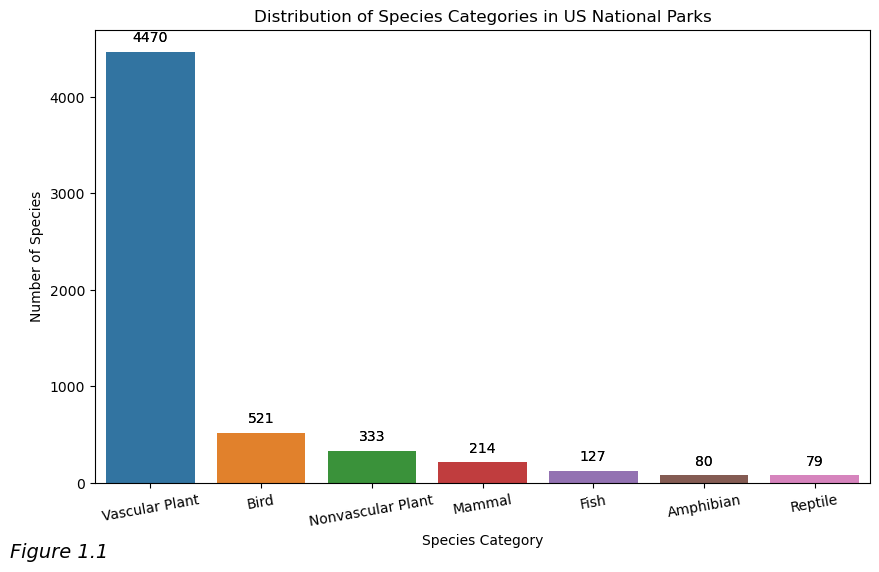

In [13]:
category_list = ['Vascular Plant', 'Bird', 'Novascular Plant', 'Mammal', 'Fish', 'Amphibian', 'Reptile']

#print('Number of species in each category:\n')
#for i in range(len(category_list)):
#    print(category_list[i], species.category.value_counts()[i])
#print('\n')
#print('Percentage distribution of animal categories:\n')
#for i in range(len(category_list)):
#    print(category_list[i], np.round(species.category.value_counts(normalize = True)[i],3))
    

category_value_list = species.category.value_counts().to_list()
print(category_value_list)
    
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
sns.countplot(x = species.category, order = species.category.value_counts().index)
plt.xticks(rotation=10)

ax = sns.countplot(x = species.category,order = species.category.value_counts().index)

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Distribution of Species Categories in US National Parks')
plt.xlabel('Species Category')
plt.ylabel('Number of Species')
plt.show()


#### 3.2.2 "species_info.csv" / Scientific Name

In [14]:
print(species.scientific_name.value_counts(), '\n')
# As we can see there are certain scientific names that repeat itself. The repetition is of maximum '3'.
# We will introduce Counter function to see the number of each name repeated.
values = species['scientific_name'].value_counts().keys().tolist()
counts = species['scientific_name'].value_counts().tolist()

repeats = list(Counter(counts).values()) # counts the elements' frequency

#print(repeats, '\n')

#three_repeats = values[0:9]
#two_repeats = values[10:275]
#print('3 repeats : "', three_repeats,'\n')
# print('2 repeats', two_repeats)

# The rest 5267 scientific names are unique to the animal



Procyon lotor                          3
Columba livia                          3
Canis lupus                            3
Holcus lanatus                         3
Castor canadensis                      3
                                      ..
Sphenopholis nitida                    1
Eriogonum wrightii var. trachygonum    1
Kerria japonica                        1
Strophostyles umbellata                1
Chaenomeles speciosa                   1
Name: scientific_name, Length: 5541, dtype: int64 



#### 3.2.3 Species / Common Name

In [15]:
print(species.common_names.value_counts(), '\n')

# Similarly there are species with different scientific names, that share common names. 
# Here is the tally of those entries.

Brachythecium Moss         7
Dicranum Moss              7
Bryum Moss                 6
Sphagnum                   6
Panic Grass                6
                          ..
Bonneville Shootingstar    1
Northern Waterthrush       1
Spicebush                  1
Ozark Dropseed             1
Subalpine Aster            1
Name: common_names, Length: 5504, dtype: int64 



#### 3.2.4 Species / Conservation Status

Of No Concern         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64 

Percentage distribution of animal categories:

Of No Concern 0.967
Species of Concern 0.028
Endangered 0.003
Threatened 0.002
In Recovery 0.001


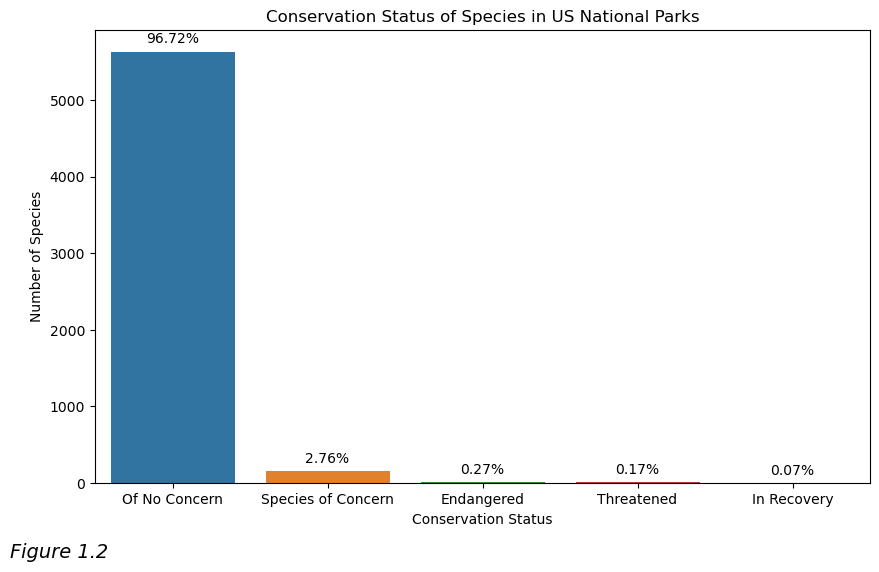

In [16]:
print(species.conservation_status.value_counts(), '\n')
conservation_list = ['Of No Concern', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
print('Percentage distribution of animal categories:\n')
for i in range(len(conservation_list)):
    print(conservation_list[i], np.round(species.conservation_status.value_counts(normalize = True)[i],3))
    
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
percentages_list = ['96.72%','2.76%','0.27%', '0.17%','0.07%']
g = sns.countplot(x = species.conservation_status)
i=0
for p in g.patches:
    g.annotate(format(percentages_list[i]), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center',
               xytext = (0, 9), 
               textcoords = 'offset points')
    i += 1
plt.xticks(rotation=0)
plt.title('Conservation Status of Species in US National Parks')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.show()

#### 3.2.5 Observations / Scientific Name

In [17]:
print(observations.scientific_name.value_counts())

Holcus lanatus                               12
Columba livia                                12
Hypochaeris radicata                         12
Canis lupus                                  12
Streptopelia decaocto                        12
                                             ..
Chaenactis glabriuscula var. heterocarpha     4
Cornus canadensis                             4
Regina septemvittata                          4
Elytrigia repens var. repens                  4
Coluber constrictor constrictor               4
Name: scientific_name, Length: 5541, dtype: int64


#### 3.2.6 Observations / Park Name

Yellowstone National Park              5824
Bryce National Park                    5824
Yosemite National Park                 5824
Great Smoky Mountains National Park    5824
Name: park_name, dtype: int64


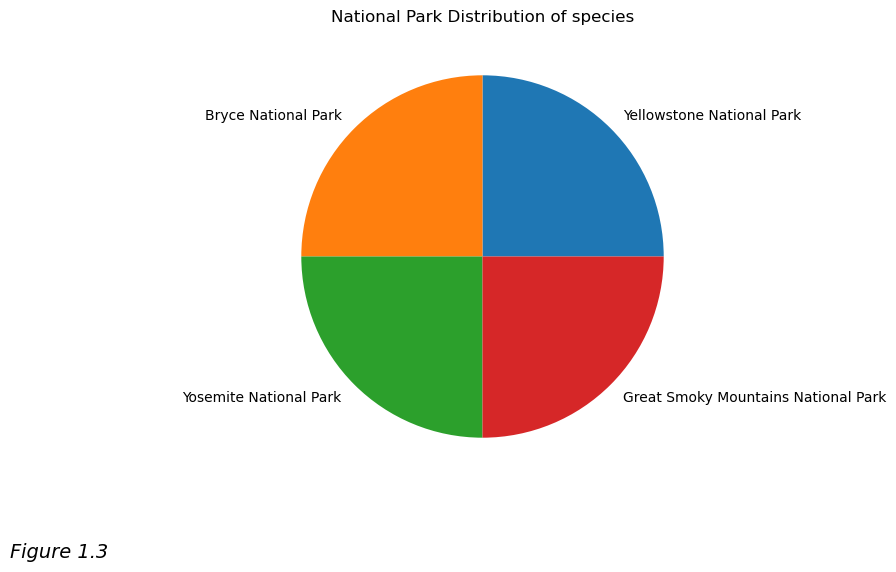

In [18]:
print(observations.park_name.value_counts())

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.3"
plt.title('National Park Distribution of species')
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

observations.park_name.value_counts().plot(kind='pie', ylabel = '')

plt.show()

#### 3.2.7 Observations / Observations

{'<20': 28, '20-39': 266, '40-59': 1268, '60-79': 2923, '80-99': 3773, '100-119': 2889, '120-139': 2305, '140-159': 2294, '160-179': 1387, '180-199': 378, '200-220': 464}


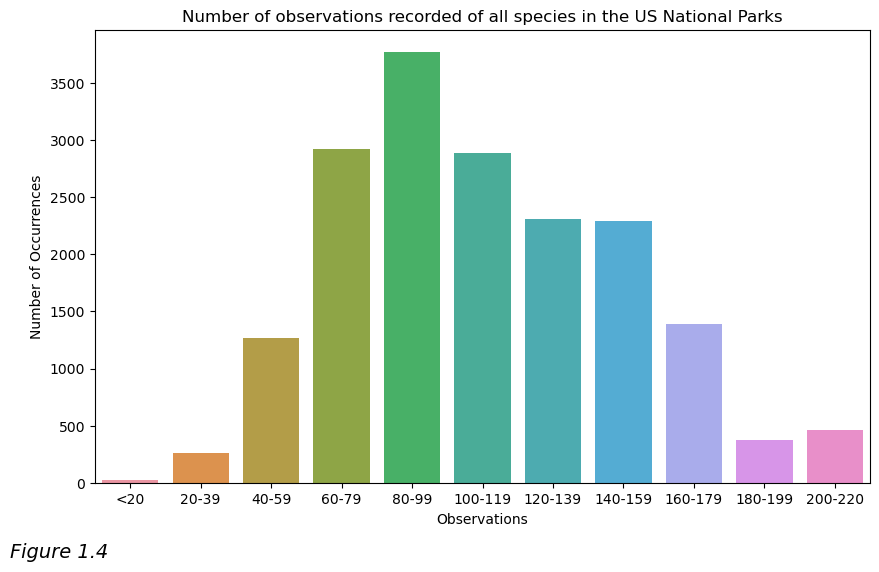

In [19]:
#print(observations.observations.value_counts())
observation_labels = {'<20': 0, '20-39':0, '40-59':0, '60-79':0, '80-99':0, '100-119':0, '120-139':0, '140-159':0, 
                      '160-179':0, '180-199':0, '200-220':0}
for i in observations.observations:
    if i < 20:
        observation_labels['<20'] += 1
    if i >= 20 and i < 40:
        observation_labels['20-39'] += 1
    if i >= 40 and i < 60:
        observation_labels['40-59'] += 1
    if i >= 60 and i < 80:
        observation_labels['60-79'] += 1
    if i >= 80 and i < 100:
        observation_labels['80-99'] += 1
    if i >= 100 and i < 120:
        observation_labels['100-119'] += 1
    if i >= 120 and i < 140:
        observation_labels['120-139'] += 1
    if i >= 140 and i < 160:
        observation_labels['140-159'] += 1
    if i >= 160 and i < 180:
        observation_labels['160-179'] += 1
    if i >= 180 and i < 200:
        observation_labels['180-199'] += 1
    if i >= 200 and i <= 220:
        observation_labels['200-220'] += 1
    
print(observation_labels)

fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 1.4"
plt.title('Number of observations recorded of all species in the US National Parks')
plt.xlabel('Observations')
plt.ylabel('Number of Occurrences')
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')

keys = list(observation_labels.keys())
vals = list(observation_labels.values())
sns.barplot(x=keys, y=vals)
plt.show()

plt.close()



## 4 Data Analysis

#### 4.1 Are certain categories of Animals more at risk?

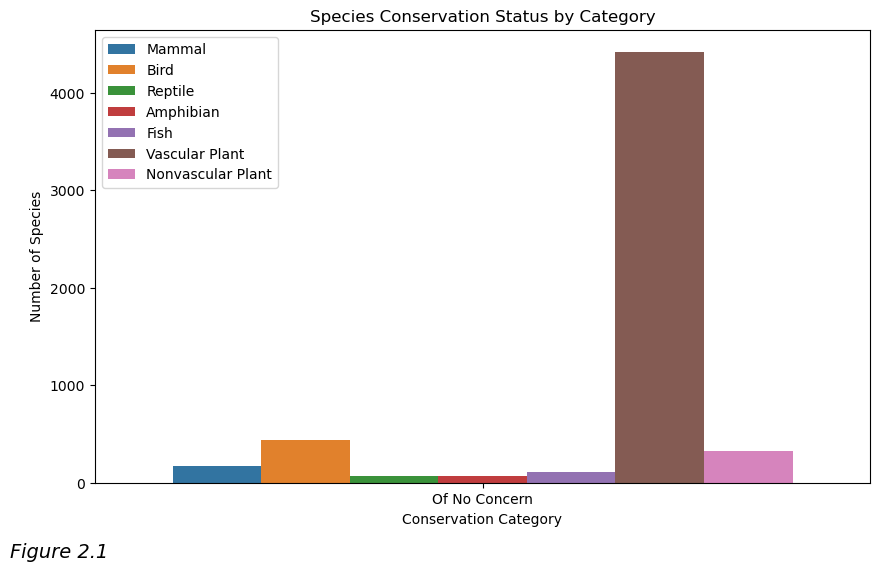

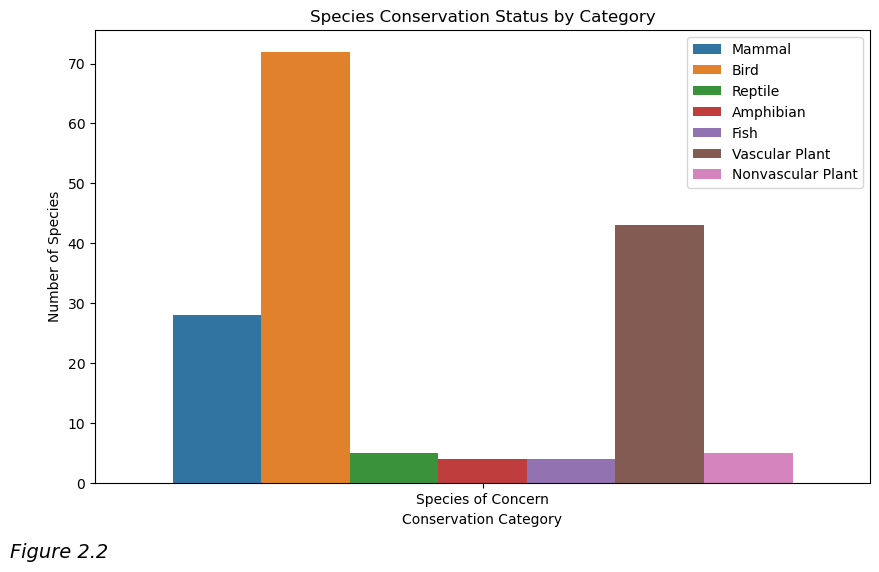

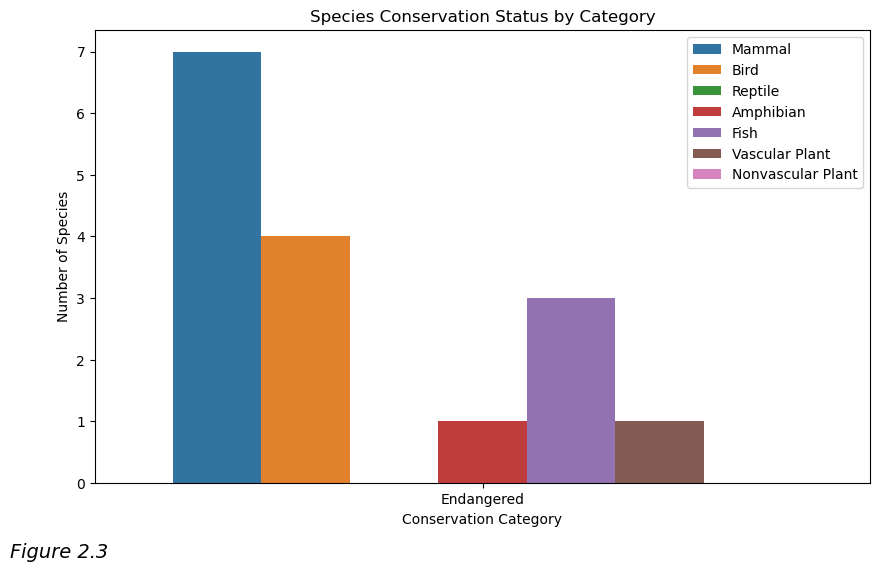

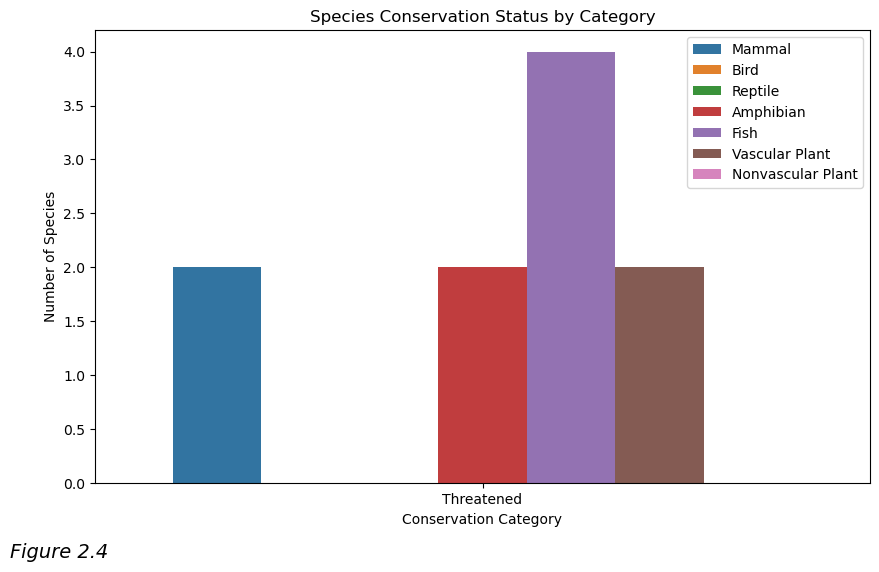

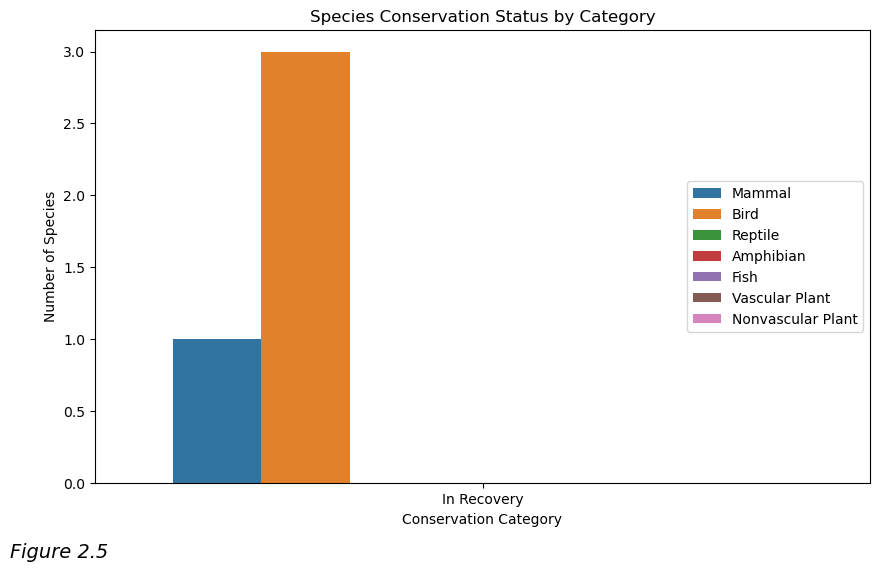

In [20]:
#1
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 2.1"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
plt.xticks(rotation=0)

no_concern = species.conservation_status.loc[species.conservation_status == "Of No Concern"]

sns.countplot( hue = species.category, x = no_concern)


plt.legend(loc='best')
plt.title('Species Conservation Status by Category')
plt.xlabel('Conservation Category')
plt.ylabel('Number of Species')
plt.show()


#2
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 2.2"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
plt.xticks(rotation=0)

species_of_concern = species.conservation_status.loc[species.conservation_status == "Species of Concern"]

sns.countplot( hue = species.category, x = species_of_concern)


plt.legend(loc='best')
plt.title('Species Conservation Status by Category')
plt.xlabel('Conservation Category')
plt.ylabel('Number of Species')
plt.show()


#3
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 2.3"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
plt.xticks(rotation=0)

endangered = species.conservation_status.loc[species.conservation_status == "Endangered"]

sns.countplot( hue = species.category, x = endangered)


plt.legend(loc='best')
plt.title('Species Conservation Status by Category')
plt.xlabel('Conservation Category')
plt.ylabel('Number of Species')
plt.show()


#4
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 2.4"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
plt.xticks(rotation=0)

threatened = species.conservation_status.loc[species.conservation_status == "Threatened"]

sns.countplot( hue = species.category, x = threatened)


plt.legend(loc='best')
plt.title('Species Conservation Status by Category')
plt.xlabel('Conservation Category')
plt.ylabel('Number of Species')
plt.show()


#5
fig = plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')
text = "Figure 2.5"
plt.figtext(0.04, 0.0, text, wrap = True, fontsize = 14, fontstyle = 'oblique')
plt.xticks(rotation=0)

in_recovery = species.conservation_status.loc[species.conservation_status == "In Recovery"]

sns.countplot( hue = species.category, x = in_recovery)


plt.legend(loc='right')
plt.title('Species Conservation Status by Category')
plt.xlabel('Conservation Category')
plt.ylabel('Number of Species')
plt.show()


#### 4.1 Are certain categories of Animals at a bigger chance of being endangered? 

In [21]:
# Creating a new table for Chi 2 Test

mamal = species.loc[species['category'] == 'Mammal']
bird = species.loc[species['category'] == 'Bird']
reptile = species.loc[species['category'] == 'Reptile']
amphibian = species.loc[species['category'] == 'Amphibian']
fish = species.loc[species['category'] == 'Fish']
vascular_plant = species.loc[species['category'] == 'Vascular Plant']
nonvascular_plant =species.loc[species['category'] == 'Nonvascular Plant']


category_frame_list = [mamal, bird, reptile, amphibian, fish, vascular_plant, nonvascular_plant]

protected_list = []
notprotected_list = []

for sp in category_frame_list:
    protected_list.append(sp.conservation_status[sp.conservation_status != 'Of No Concern'].count())
    notprotected_list.append(sp.conservation_status[sp.conservation_status == 'Of No Concern'].count())
    
percent_protected = []    

for i in range(len(category_frame_list)):
    percent_protected.append(round(protected_list[i]/notprotected_list[i] * 100,2)) 


chi_data = {'category':  ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'], 
            'not_protected': notprotected_list,'protected': protected_list, 
            'percent_protected': percent_protected}

df = pd.DataFrame.from_dict(data=chi_data)





display(df)




,category,not_protected,protected,percent_protected
0,Mammal,176,38,21.59
1,Bird,442,79,17.87
2,Reptile,74,5,6.76
3,Amphibian,73,7,9.59
4,Fish,116,11,9.48
5,Vascular Plant,4424,46,1.04
6,Nonvascular Plant,328,5,1.52


The table above represent 7 categories of animals. It has column "not_protected", which represents all the species in that category which are listed as 'Of No Concern'. 

The column 'protected' would be all other listings such as 'Threatened' and therefore classed as protected. 

The percent protected column would be protected/not_protected percentage. We can see that mamals have the most species listed as protected relative to others in their category. 

#### Test Conditions

ASSUMPTIONS

- observations independently randomly sampled
- categories of both variables are mutually exclusive (can’t be both in 1st grade and 2nd grade etc)
- groups should be independent (cannot be used if one variable represents different time points)

THE TEST 

- use if want to understand whether outcomes of two categorical variables are associated
- examples:
	- in an A/ B test, if one group was show a green submit button, and another was shown a purple submit button, was one 	  group more likely to click submit than another?
	- for people under 40 in a survey answering “which of the following 3 products is your favourite?” was there a significant 	  difference in preference between age groups?

- null hypothesis: no association between variables

- use SciPy function chi2_contingency( ) with an input of a contingency table


#### NULL Hypothesis = No relationship exists on the categorical variables in the population

#### Alternative Hypothesis = Categorical variables are related in the population

#### Statistical Significance = 0.05

In [27]:
# Pearson's Chi Squared test, to understand statistical significance between endangered species

cont_bird_mammal = [[79, 442],
              [38, 176]]

chi2, pval, dof, expected = chi2_contingency(cont_bird_mammal)

print(pval)

0.445901703047197


The result when comparing Birds and Mamals is significantly higher than the value of Statistical Significance and therefore we can reject the Null Hypothesis. The two results are related in the population.

In [29]:
cont_reptile_mamal = [[5, 74],
              [38, 176]]

chi2, pval, dof, expected = chi2_contingency(cont_reptile_mamal)

print(pval)

0.02338465214871547


The result when comparing Reptiles and Mamals is less than the value of Statistical Significance and therefore we fail to reject the Null Hypothesis. The two results are unrelated in the population.

## 5 Conclusion

In order to reflect on the project we need to return to the goals we had in the scope:

>The goal of this project is to understand the biodiversity in the National Parks. Which species and what category groups are most in risk. To explore the characteristics about the species and their conservations status as well as their relationship between each other. Which species are most common and least common. Does it effect their conservation status? And many more.


At the begining of the project I have mainly worked with data. The data was checked for any irregularities and was cleaned up to be usable in the visualisations and analysis. The data turned out to be mostly clean and only needed insignificant alterations.

Explaratory Data Analysis was to follow, and early on it was determined that 96.72% of species in the data presented are listed as not protected. 5633 entries vs 191.

Number of visualisations were drown up to represent the findings in the EDA. 

Mammals and Birds were found to not have the segnificant difference in conservation percentage, while the Mammals and Reptiles showed statistically significant difference. 

Overall I have reached my goals and was able to answer a few questions I have drawn up. 